In [109]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("survey_results_public.csv")
df.head()

,ResponseId,MainBranch,Employment,Country,US_State,UK_Country,EdLevel,Age1stCode,LearnCode,YearsCode,...,Age,Gender,Trans,Sexuality,Ethnicity,Accessibility,MentalHealth,SurveyLength,SurveyEase,ConvertedCompYearly
0,1,I am a developer by profession,"Independent contractor, freelancer, or self-em...",Slovakia,NaN,NaN,"Secondary school (e.g. American high school, G...",18 - 24 years,Coding Bootcamp;Other online resources (ex: vi...,NaN,...,25-34 years old,Man,No,Straight / Heterosexual,White or of European descent,None of the above,None of the above,Appropriate in length,Easy,62268.0
1,2,I am a student who is learning to code,"Student, full-time",Netherlands,NaN,NaN,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",11 - 17 years,"Other online resources (ex: videos, blogs, etc...",7,...,18-24 years old,Man,No,Straight / Heterosexual,White or of European descent,None of the above,None of the above,Appropriate in length,Easy,NaN
2,3,"I am not primarily a developer, but I write co...","Student, full-time",Russian Federation,NaN,NaN,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",11 - 17 years,"Other online resources (ex: videos, blogs, etc...",NaN,...,18-24 years old,Man,No,Prefer not to say,Prefer not to say,None of the above,None of the above,Appropriate in length,Easy,NaN
3,4,I am a developer by profession,Employed full-time,Austria,NaN,NaN,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",11 - 17 years,NaN,NaN,...,35-44 years old,Man,No,Straight / Heterosexual,White or of European descent,I am deaf / hard of hearing,NaN,Appropriate in length,Neither easy nor difficult,NaN
4,5,I am a developer by profession,"Independent contractor, freelancer, or self-em...",United Kingdom of Great Britain and Northern I...,NaN,England,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",5 - 10 years,Friend or family member,17,...,25-34 years old,Man,No,NaN,White or of European descent,None of the above,NaN,Appropriate in length,Easy,NaN


In [110]:
df = df[['Country', 'EdLevel', 'YearsCodePro', 'Employment','ConvertedCompYearly']]
df = df.rename({'ConvertedCompYearly':'Salary'}, axis=1)
df.head()

,Country,EdLevel,YearsCodePro,Employment,Salary
0,Slovakia,"Secondary school (e.g. American high school, G...",NaN,"Independent contractor, freelancer, or self-em...",62268.0
1,Netherlands,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",NaN,"Student, full-time",NaN
2,Russian Federation,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",NaN,"Student, full-time",NaN
3,Austria,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",NaN,Employed full-time,NaN
4,United Kingdom of Great Britain and Northern I...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",10,"Independent contractor, freelancer, or self-em...",NaN


In [111]:
df = df[df['Salary'].notnull()]
df.head()

,Country,EdLevel,YearsCodePro,Employment,Salary
0,Slovakia,"Secondary school (e.g. American high school, G...",NaN,"Independent contractor, freelancer, or self-em...",62268.0
9,Sweden,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",4,Employed full-time,51552.0
11,Spain,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",5,Employed full-time,46482.0
12,Germany,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",6,Employed full-time,77290.0
16,Turkey,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",2,Employed full-time,17748.0


In [112]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 46844 entries, 0 to 83438
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Country       46844 non-null  object 
 1   EdLevel       46823 non-null  object 
 2   YearsCodePro  46391 non-null  object 
 3   Employment    46831 non-null  object 
 4   Salary        46844 non-null  float64
dtypes: float64(1), object(4)
memory usage: 2.1+ MB


In [113]:
df = df.dropna(how='any',axis=0)
df.isnull().sum()

Country         0
EdLevel         0
YearsCodePro    0
Employment      0
Salary          0
dtype: int64

In [114]:
df = df[df["Employment"]=="Employed full-time"]
df = df.drop("Employment", axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40211 entries, 9 to 83438
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Country       40211 non-null  object 
 1   EdLevel       40211 non-null  object 
 2   YearsCodePro  40211 non-null  object 
 3   Salary        40211 non-null  float64
dtypes: float64(1), object(3)
memory usage: 1.5+ MB


In [115]:
df['Country'].value_counts()

United States of America                                9175
India                                                   3385
Germany                                                 2753
United Kingdom of Great Britain and Northern Ireland    2604
Canada                                                  1553
                                                        ... 
Saint Kitts and Nevis                                      1
Monaco                                                     1
Libyan Arab Jamahiriya                                     1
Somalia                                                    1
Burundi                                                    1
Name: Country, Length: 166, dtype: int64

In [116]:
df['Country'].value_counts().index


Index(['United States of America', 'India', 'Germany',
       'United Kingdom of Great Britain and Northern Ireland', 'Canada',
       'France', 'Brazil', 'Spain', 'Netherlands', 'Australia',
       ...
       'Lao People's Democratic Republic', 'Saint Vincent and the Grenadines',
       'Djibouti', 'Dominica', 'Saint Lucia', 'Saint Kitts and Nevis',
       'Monaco', 'Libyan Arab Jamahiriya', 'Somalia', 'Burundi'],
      dtype='object', length=166)

In [117]:
def shorten_categories(categories, cutt_off):
    categorical_map = {}
    for i in range(len(categories)):
        if categories.values[i] >= 400:
            categorical_map[categories.index[i]] = categories.index[i]
        else:
            categorical_map[categories.index[i]] = 'Other'
    return categorical_map

    

In [118]:
country_map = shorten_categories(df['Country'].value_counts(), 400)
df['Country'] = df['Country'].map(country_map)
df.Country.value_counts()

Other                                                   10725
United States of America                                 9175
India                                                    3385
Germany                                                  2753
United Kingdom of Great Britain and Northern Ireland     2604
Canada                                                   1553
France                                                   1396
Brazil                                                   1340
Spain                                                     890
Netherlands                                               835
Australia                                                 825
Poland                                                    775
Italy                                                     756
Russian Federation                                        741
Sweden                                                    735
Turkey                                                    458
Switzerl

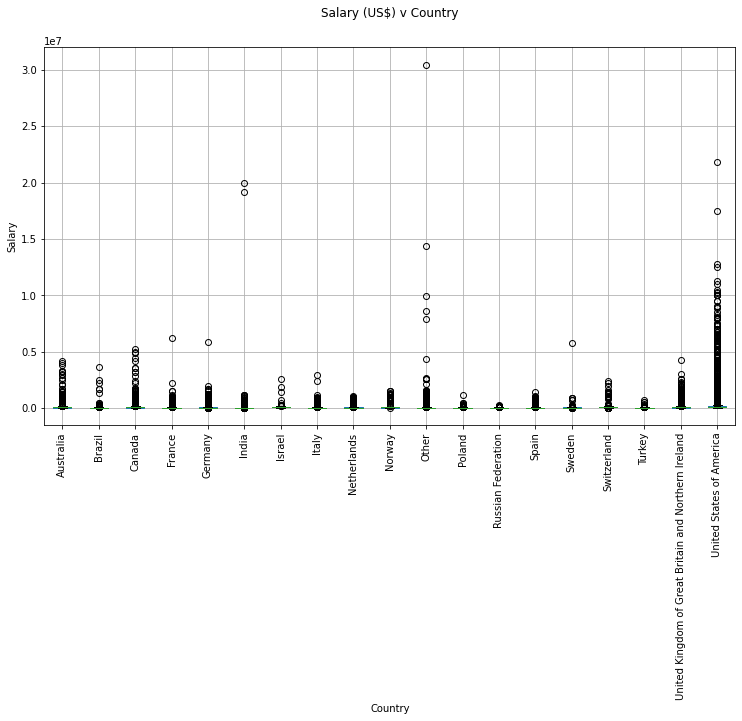

In [119]:
fig, ax = plt.subplots(1,1, figsize=(12,7))
df.boxplot('Salary', 'Country', ax=ax)
plt.suptitle('Salary (US$) v Country')
plt.title('')
plt.xlabel('Country')
plt.ylabel('Salary')
plt.xticks(rotation=90)
plt.show()

In [120]:
df = df[df['Salary'] <= 300000]
df = df[df['Salary'] > 15000]
df = df[df['Country'] != 'Other']

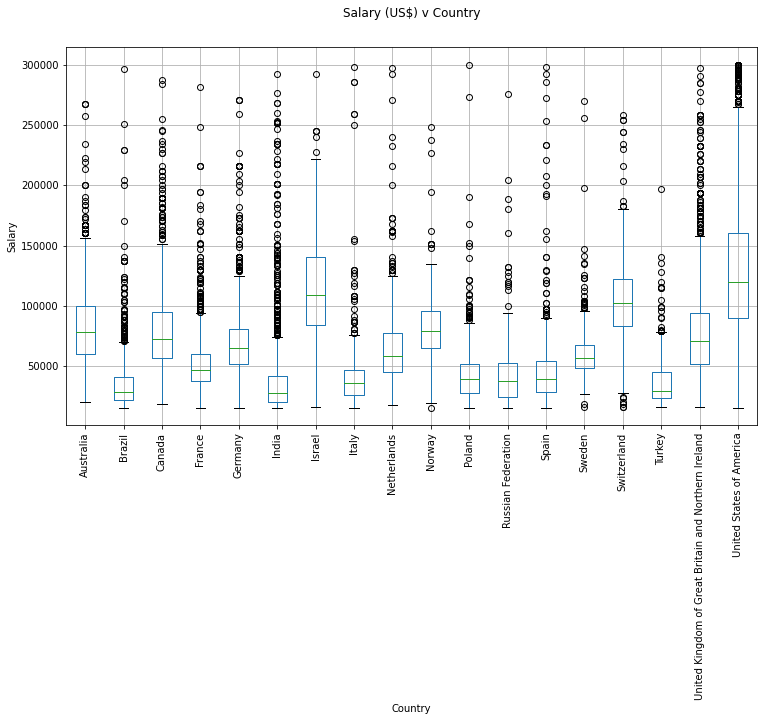

In [121]:
fig, ax = plt.subplots(1,1, figsize=(12,7))
df.boxplot('Salary', 'Country', ax=ax)
plt.suptitle('Salary (US$) v Country')
plt.title('')
plt.xlabel('Country')
plt.ylabel('Salary')
plt.xticks(rotation=90)
plt.show()

In [122]:
# df['YearsCodePro'].values[21] = 12.0
df['YearsCodePro'].unique()



array(['4', '5', '6', '2', '18', '21', '16', '10', 'Less than 1 year',
       '15', '3', '12', '8', '17', '1', '14', '26', '34', '11', '25',
       '24', '22', '13', '9', '7', '39', '20', '27', '23', '35', '30',
       '19', '33', '37', '43', '40', '29', '38', '31', '42', '28', '46',
       '32', '36', '47', '45', '44', '41', 'More than 50 years', '50',
       '49', '48'], dtype=object)

In [123]:
def clean_experience(x):
    if x == None:
        return 12.0
    if x == 'Less than 1 year':
        return 0.5
    if x == 'More than 50 years':
        return 50.0
    return float(x)
df['YearsCodePro'] = df['YearsCodePro'].apply(clean_experience)
df['YearsCodePro'].unique()

array([ 4. ,  5. ,  6. ,  2. , 18. , 21. , 16. , 10. ,  0.5, 15. ,  3. ,
       12. ,  8. , 17. ,  1. , 14. , 26. , 34. , 11. , 25. , 24. , 22. ,
       13. ,  9. ,  7. , 39. , 20. , 27. , 23. , 35. , 30. , 19. , 33. ,
       37. , 43. , 40. , 29. , 38. , 31. , 42. , 28. , 46. , 32. , 36. ,
       47. , 45. , 44. , 41. , 50. , 49. , 48. ])

In [124]:
df['EdLevel'].unique()
df['EdLevel'].dtypes

dtype('O')

In [125]:
df.head(40)

,Country,EdLevel,YearsCodePro,Salary
9,Sweden,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",4.0,51552.0
11,Spain,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",5.0,46482.0
12,Germany,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",6.0,77290.0
16,Turkey,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",2.0,17748.0
17,Canada,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",6.0,46135.0
23,France,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",2.0,38915.0
24,Germany,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",18.0,77831.0
26,Switzerland,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",5.0,81319.0
27,United Kingdom of Great Britain and Northern I...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",21.0,68507.0
29,Russian Federation,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",16.0,37752.0


In [126]:
def clean_education(x):
    if 'Bachelor’s degree' in x:
        return "Bachelor’s degree"
    if 'Master’s degree' in x:
        return "Master’s degree"
    if 'Professional degree' in x or 'Other doctoral' in x:
        return "Post grad"

    return "Less than a Bachelors"
df['EdLevel'] = df['EdLevel'].astype(str)
df['EdLevel'] = df['EdLevel'].apply(clean_education)

In [127]:
df['EdLevel'].unique()

array(['Master’s degree', 'Bachelor’s degree', 'Less than a Bachelors',
       'Post grad'], dtype=object)

In [128]:
from sklearn.preprocessing import LabelEncoder
le_education = LabelEncoder()
df['EdLevel'] = le_education.fit_transform(df['EdLevel'])
df['EdLevel'].unique()

array([2, 0, 1, 3])

In [129]:
le_country = LabelEncoder()
df['Country'] = le_country.fit_transform(df['Country'])
df['Country'].unique()

array([13, 12,  4, 15,  2,  3, 14, 16, 11,  6, 17,  1,  7,  8, 10,  0,  5,
        9])

In [130]:
df.isna().any()

Country         False
EdLevel         False
YearsCodePro    False
Salary          False
dtype: bool

In [131]:
df.dropna()
x = df.drop('Salary', axis=1)
y = df['Salary']

In [132]:
from sklearn.linear_model import LinearRegression
linear_reg = LinearRegression()
linear_reg.fit(x, y.values)

LinearRegression()

In [133]:
y_pred = linear_reg.predict(x)

In [134]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np
error = np.sqrt(mean_squared_error(y, y_pred))

In [135]:
error

45278.62075582522

In [136]:
from sklearn.tree import DecisionTreeRegressor
tree_reg = DecisionTreeRegressor(random_state=0)
tree_reg.fit(x, y.values)


DecisionTreeRegressor(random_state=0)

In [137]:
y_pred = tree_reg.predict(x)

In [138]:
error = np.sqrt(mean_squared_error(y,y_pred))
print("${:,.02f}".format(error))

$35,360.88


In [139]:
from sklearn.ensemble import RandomForestRegressor
for_reg = RandomForestRegressor(random_state=0)
for_reg.fit(x, y.values)

RandomForestRegressor(random_state=0)

In [140]:
y_pred = for_reg.predict(x)

In [141]:
error = np.sqrt(mean_squared_error(y, y_pred))
print("${:,.02f}".format(error))

$35,438.48


In [142]:
from sklearn.model_selection import GridSearchCV
max_depth = [None, 2, 4, 6, 8, 10, 12]
parameters = {"max_depth":max_depth}
regressor = DecisionTreeRegressor(random_state=0)
gs = GridSearchCV(regressor, parameters, scoring='neg_mean_squared_error')
gs.fit(x, y.values)

GridSearchCV(estimator=DecisionTreeRegressor(random_state=0),
             param_grid={'max_depth': [None, 2, 4, 6, 8, 10, 12]},
             scoring='neg_mean_squared_error')

In [143]:
regressor = gs.best_estimator_
regressor.fit(x, y.values)
y_pred = regressor.predict(x)
error = np.sqrt(mean_squared_error(y, y_pred))
print("${:,.02f}".format(error))

$36,489.36


In [144]:
x

,Country,EdLevel,YearsCodePro
9,13,2,4.0
11,12,0,5.0
12,4,2,6.0
16,15,0,2.0
17,2,0,6.0
...,...,...,...
83430,17,2,21.0
83432,2,0,0.5
83434,17,0,5.0
83436,17,1,4.0


In [150]:
x = np.array([["United States of America", "Master’s degree", 15]])
x

array([['United States of America', 'Master’s degree', '15']],
      dtype='<U24')

In [151]:
x[:, 0] = le_country.transform(x[:, 0])
x[:, 1] = le_education.transform(x[:, 1])
x = x.astype(float)
x

array([[17.,  2., 15.]])

In [153]:
y_pred = regressor.predict(x)
y_pred

/home/chris/notebook/jupyterenv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


array([152920.60416667])

In [154]:
import pickle
data = {'model':regressor, 'le_country':le_country, 'le_education':le_education}
with open('saved_steps.pkl', 'wb') as file:
    pickle.dump(data, file)

In [155]:
with open('saved_steps.pkl', 'rb') as file:
    data = pickle.load(file)
regressor_loaded = data['model']
le_country = data['le_country']
le_education = data['le_education']


In [156]:
y_pred = regressor_loaded.predict(x)
y_pred

/home/chris/notebook/jupyterenv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


array([152920.60416667])